## Additive Decomposition

In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import math
import matplotlib.pyplot as plt

## Helper Functions

In [15]:
def m_moving_average(data, m, column_name):
    '''
     """
        Creates an m-MA trend component for a time series column, based on 
        value m as in m-Moving Average alogrithm for Trend computation(Rob j Hyndman fpp).
        
        Parameters
        ----------
        data : pandas DataFrame object having data as time series sequence. 
        m : parameter m as in m-Moving Average alogrithm for Trend computation(Rob j Hyndman fpp).
        column_name : name of the column to find trend for.
        
        Returns
        -------
        None
    '''
    
    # window size based on m.
    k = (m)//2
    column_index = data.columns.get_loc(column_name)
    # number of rows in the data
    no_of_data_points = data.shape[0]
    
    # creating a list containing offsets for the window
    if m%2 == 1:
        window_m = list(range(-k, k+1, 1)) 
    if m%2 == 0:
        window_m = list(range(-(k-1), k+1, 1))
    if m==2:
        window_m = [-1, 0]
    
    start = k-1
    moving_average_column_name = " ".join([str(m),"MA",column_name])
    for y in range(start, no_of_data_points-k):
        sum_m = 0
        # sum up all the points within k window of t [t-k, t-(k-1), ..., t-1, t, t+1, ..., t+(k-1), t+k]
        for t in window_m:
            sum_m = sum_m + data.iloc[y+t, column_index]
        # Divide the sum by m to find the average
        average = sum_m / m
        data.loc[data.index[y], moving_average_column_name] = average
    return None

In [58]:
def plot_results(data, original_column_name, trend_column_name):
    '''
    Plots and saves comparison plot between original time series and the mMA component, 
    given the original column name and trend column name,
    and sets the ylabel, xlabel, aligns the ticks.
    
    Parameters
    ----------
    data : Pandas dataframe having at least one column.
    orginal_column_name : name of the column for raw data series.
    trend_column_name : name of the trend column.
    Returns
    -------
    None
    '''
    # font Dictionary to set the text of plots
    font = {
            'weight' : 'bold',
            'size'   : 16,
        }

    plt.rc('font', **font)
    # Set the figsize
    plt.rcParams['figure.figsize'] = 15, 10
    plt.plot(data[original_column_name], label=original_column_name)
    plt.plot(data[trend_column_name], label=trend_column_name)
    plt.legend(loc="best")
    plt.ylabel(original_column_name)
    plt.xlabel(data.index.name)
    #Creates spacing between the ticks
    plt.xticks(np.arange(0,220,7), rotation='vertical')
    #Helps in preventing the ticks from chopping off.
    plt.tight_layout()
    plot_name = "".join([trend_column_name,".jpg"])
    plt.savefig(plot_name)
    plt.show()
    return None

## 1) Load file for australian quarterly beer dataset.

In [54]:
data = pd.read_csv("../data/Raw/ausbeer.csv", index_col="Date")

In [55]:
data.head()

,Total quarterly beer production in Australia (in megalitres)
Date,
01-03-1956,284
01-06-1956,213
01-09-1956,227
01-12-1956,308
01-03-1957,262


## 2) Find the trend component.

In [89]:
m_moving_average(data, m=4, column_name="Total quarterly beer production in Australia (in megalitres)")
m_moving_average(data, m=2, column_name="4 MA Total quarterly beer production in Australia (in megalitres)")

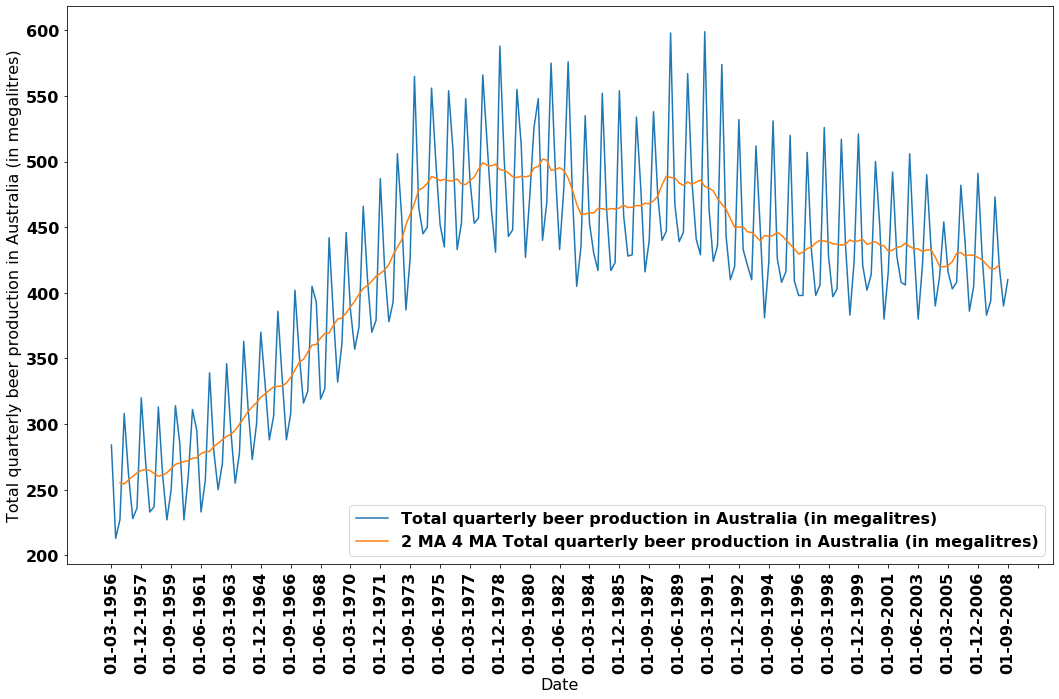

In [90]:
plot_results(data, "Total quarterly beer production in Australia (in megalitres)", "2 MA 4 MA Total quarterly beer production in Australia (in megalitres)")

## Compare results with statsmodel

In [91]:
decomposed_result = seasonal_decompose(data["Total quarterly beer production in Australia (in megalitres)"], model="additive", freq=4)

In [92]:
decomposed_result.seasonal

Date
01-03-1956     2.519184
01-06-1956   -42.790724
01-09-1956   -28.997643
01-12-1956    69.269184
01-03-1957     2.519184
01-06-1957   -42.790724
01-09-1957   -28.997643
01-12-1957    69.269184
01-03-1958     2.519184
01-06-1958   -42.790724
01-09-1958   -28.997643
01-12-1958    69.269184
01-03-1959     2.519184
01-06-1959   -42.790724
01-09-1959   -28.997643
01-12-1959    69.269184
01-03-1960     2.519184
01-06-1960   -42.790724
01-09-1960   -28.997643
01-12-1960    69.269184
01-03-1961     2.519184
01-06-1961   -42.790724
01-09-1961   -28.997643
01-12-1961    69.269184
01-03-1962     2.519184
01-06-1962   -42.790724
01-09-1962   -28.997643
01-12-1962    69.269184
01-03-1963     2.519184
01-06-1963   -42.790724
                ...    
01-06-2001   -42.790724
01-09-2001   -28.997643
01-12-2001    69.269184
01-03-2002     2.519184
01-06-2002   -42.790724
01-09-2002   -28.997643
01-12-2002    69.269184
01-03-2003     2.519184
01-06-2003   -42.790724
01-09-2003   -28.997643
01-12-2003 

## 3) Detrend the data additively.

In [93]:
data["Additive detrend"] = data["Total quarterly beer production in Australia (in megalitres)"] - data["2 MA 4 MA Total quarterly beer production in Australia (in megalitres)"]

## 4) Find seasonality on the detrended data.

In [94]:
m, n = data.shape

In [95]:
data

,Total quarterly beer production in Australia (in megalitres),4 MA Total quarterly beer production in Australia (in megalitres),2 MA 4 MA Total quarterly beer production in Australia (in megalitres),Additive detrend
Date,,,,
01-03-1956,284,NaN,NaN,NaN
01-06-1956,213,258.00,NaN,NaN
01-09-1956,227,252.50,255.250,-28.250
01-12-1956,308,256.25,254.375,53.625
01-03-1957,262,258.50,257.375,4.625
01-06-1957,228,261.50,260.000,-32.000
01-09-1957,236,264.00,262.750,-26.750
01-12-1957,320,265.25,264.625,55.375
01-03-1958,272,265.50,265.375,6.625


In [96]:
data.loc[data.index[0], "Additive detrend"]

nan

In [99]:
frequency = 4
for i in range(frequency):
    sum_of_detrend = 0
    number_of_points = 0
    current_position = i
    ### Sums up the detrended value
    while current_position < m:
        date_index = data.index[current_position]
        if math.isnan(data.loc[date_index, "Additive detrend"]) == False:
            sum_of_detrend = sum_of_detrend + data.loc[date_index, "Additive detrend"]
            number_of_points = number_of_points + 1
        current_position = current_position + frequency
    
    current_position = i
    ### Finds the seasonality
    print (sum_of_detrend, number_of_points, i)
    mean_of_trend = sum_of_detrend / number_of_points
    ### Assigns the seasonality
    while current_position < m:
        date_index = data.index[current_position]
        data.loc[date_index, "Additive Seasonal"] = mean_of_trend
        current_position = current_position + frequency
        

127.125 52 0
-2186.125 51 1
-1511.75 52 2
3598.125 52 3


In [98]:
data

,Total quarterly beer production in Australia (in megalitres),4 MA Total quarterly beer production in Australia (in megalitres),2 MA 4 MA Total quarterly beer production in Australia (in megalitres),Additive detrend,Additive Seasonal
Date,,,,,
01-03-1956,284,NaN,NaN,NaN,2.444712
01-06-1956,213,258.00,NaN,NaN,-42.865196
01-09-1956,227,252.50,255.250,-28.250,-29.072115
01-12-1956,308,256.25,254.375,53.625,69.194712
01-03-1957,262,258.50,257.375,4.625,2.444712
01-06-1957,228,261.50,260.000,-32.000,-42.865196
01-09-1957,236,264.00,262.750,-26.750,-29.072115
01-12-1957,320,265.25,264.625,55.375,69.194712
01-03-1958,272,265.50,265.375,6.625,2.444712


## 5) Remove the Seasonality and Trend component to find the residual value.